# Data Preprocessing #

In [1]:
import gzip
import pandas as pd

In [2]:
data = []
with open('./Downloads/Github/Kindle_Store.txt') as f:
    for l in f:
        data.append(l.strip())

In [3]:
filter_data = filter(lambda x: x != "", data)

In [4]:
filter_data=list(filter_data)

In [5]:
dic={i.split(':')[0]:[] for i in filter_data}
for l in filter_data:
    dic[l.split(':')[0]].append(l.split(':')[1])

In [6]:
df=pd.DataFrame.from_dict(dic)

In [7]:
for i in df.columns:
    df[i]=df[i].apply(str.strip)

In [8]:
dic={}
for i in df.columns:
    dic[i]=i.split('/')[1]

In [9]:
df.rename(columns=dic,inplace=True)

In [10]:
df.head()

,productId,title,price,userId,profileName,helpfulness,score,time,summary,text
0,B000FBFH7K,Self-Knowledge and the Self,unknown,A3VPRWEPH6C823,Yuri Kuzyk,4/4,5.0,1026172800,An up to date overview...,Jopling does an admirable job of tackling the ...
1,B000OI0QDO,Russian Messianism (Routledge Advances in Euro...,unknown,ABDE6L94T5H8R,"Andreas Umland ""SPPS""",5/7,5.0,1009670400,Varieties of Russian Messianism Explored,"In this dense, highly informative study Peter ..."
2,B000OI0QFW,Against Politics (Routledge Studies in Social ...,unknown,A2SOHLD70OSUCB,"""zacharym87""",17/17,4.0,960422400,The case against the state,De Jasay's book does an excellent job punctuat...
3,B000OI0QFM,Polish Solidarity Movement (Routledge Studies ...,unknown,unknown,unknown,2/2,3.0,909273600,For poly-sci majors only,"Scholarly to the extreme, this book assumes kn..."
4,B000FBFHES,Landmarks in Linguistic Thought Volume III,unknown,AO3BAW8YSYFLW,Thomas Emerson,9/10,5.0,1052697600,Excellent overview of traditional Arabic lingu...,Versteegh provides a thorough and very readabl...


In [11]:
df=df[df['userId']!='unknown']

In [12]:
df['score']=df['score'].astype(float)

In [13]:
df.head()

,productId,title,price,userId,profileName,helpfulness,score,time,summary,text
0,B000FBFH7K,Self-Knowledge and the Self,unknown,A3VPRWEPH6C823,Yuri Kuzyk,4/4,5.0,1026172800,An up to date overview...,Jopling does an admirable job of tackling the ...
1,B000OI0QDO,Russian Messianism (Routledge Advances in Euro...,unknown,ABDE6L94T5H8R,"Andreas Umland ""SPPS""",5/7,5.0,1009670400,Varieties of Russian Messianism Explored,"In this dense, highly informative study Peter ..."
2,B000OI0QFW,Against Politics (Routledge Studies in Social ...,unknown,A2SOHLD70OSUCB,"""zacharym87""",17/17,4.0,960422400,The case against the state,De Jasay's book does an excellent job punctuat...
4,B000FBFHES,Landmarks in Linguistic Thought Volume III,unknown,AO3BAW8YSYFLW,Thomas Emerson,9/10,5.0,1052697600,Excellent overview of traditional Arabic lingu...,Versteegh provides a thorough and very readabl...
5,B000OI0QJ8,Key Debates in Anthropology,unknown,AW91VDERXXKGT,Nessander,4/4,5.0,971308800,A fascinating read on the essence of anthropology,"What is anthropology? What is society, culture..."


# Exploratory Data Analysis #

In [14]:
df.groupby('title').mean().sort_values('score',ascending=False)

,score
title,
'Let us die that we may live',5.0
Clinical Lymphatic Mapping in Gynecologic Cancers,5.0
Legitimacy and the European Union,5.0
Legacy of Soviet Dissent (BASEES/Routledge Series on Russian and East European Studies),5.0
LeaderShock ...and How to Triumph Over It,5.0
...,...
Deepening Democracy,1.0
Scobleizer,1.0
Scanning Probe Microscopes,1.0


In [15]:
ratings=pd.DataFrame(df.groupby('title').mean())

In [16]:
ratings.rename(columns={'score':'Ratings'},inplace=True)

In [17]:
pd.DataFrame(df.groupby('title').count()['score'].sort_values(ascending=False)).head(40)

,score
title,
"Kindle Wireless Reading Device, Free 3G, 6"" Display, White - 2nd Generation [Includes USB Cable for Charging. For International Shipment]",17612
Kindle,7911
The Secret,3070
"Eat, Pray, Love",2963
The Road,2711
Three Cups of Tea,2679
"Pride and Prejudice, Annotated (Enriched Classics)",1801
A New Earth (Oprah #61),1779
Blink,1427


In [18]:
ratings['No of Ratings']=pd.DataFrame(df.groupby('title').count()['score'])

In [19]:
ratings.head()

,Ratings,No of Ratings
title,,
'Let us die that we may live',5.000000,2
"1,001 Ways to Make More Money as a Speaker, Consultant or Trainer",3.600000,5
10 Conversations You Need to Have with Your Children,4.379310,29
10 Secrets to Successful Home Buying and Selling,5.000000,7
100 Bullshit Jobs...And How to Get Them,3.411765,17


In [20]:
ratings.describe()

,Ratings,No of Ratings
count,4223.000000,4223.000000
mean,4.046879,35.891309
std,0.815664,319.952138
min,1.000000,1.000000
25%,3.695652,2.000000
50%,4.125000,6.000000
75%,4.600000,23.000000
max,5.000000,17612.000000


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

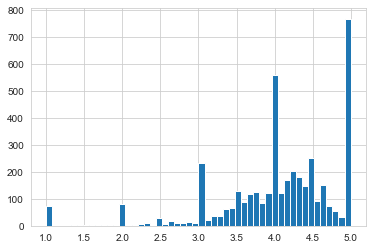

In [22]:
ratings['Ratings'].hist(bins=50)

(0.0, 70.0)

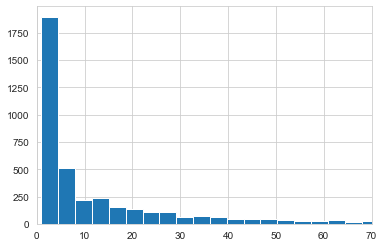

In [23]:
ratings['No of Ratings'].hist(bins=5000)
plt.xlim(0,70)

(0.0, 70.0)

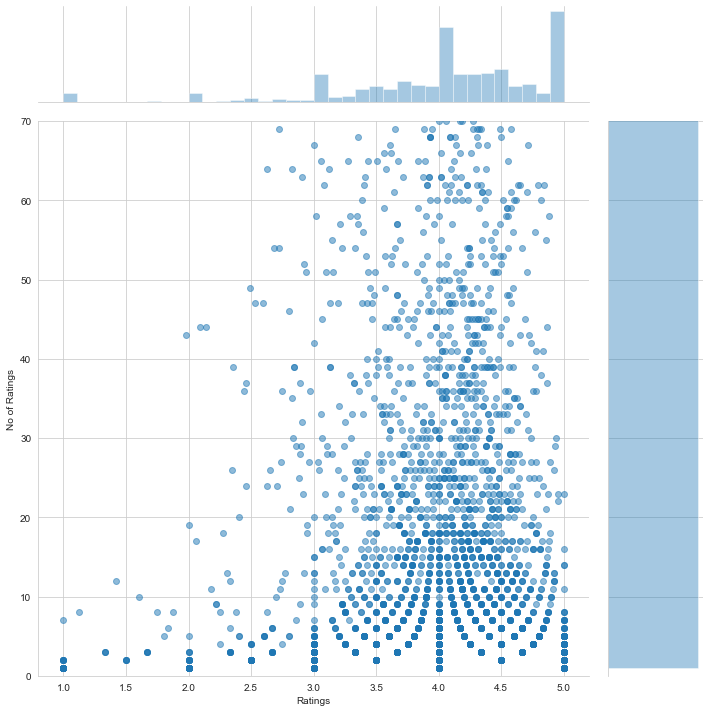

In [24]:
sns.jointplot(x='Ratings',y='No of Ratings',data=ratings,alpha=0.5,height=10)
plt.ylim(0,70)

# Recommender 1 based on Collaborative Filtering - user score #

In [28]:
kindle_mat=df.pivot_table(index='userId',columns='title',values='score')

*Recommendation for users who like the book Dreams from my father*

In [37]:
corr_Dreams_from_My_Father=pd.DataFrame(kindle_mat.corrwith(kindle_mat['Dreams from My Father']),columns=['co-relation'])

/Users/abhishek/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/abhishek/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [38]:
corr_Dreams_from_My_Father.dropna(inplace=True)


In [46]:
corr_Dreams_from_My_Father=corr_Dreams_from_My_Father.join(ratings['No of Ratings'])

In [54]:
corr_Dreams_from_My_Father[corr_Dreams_from_My_Father['No of Ratings']>23].sort_values('co-relation',ascending=False).head(20)

,co-relation,No of Ratings
title,,
Dreams from My Father,1.0,792
Kim [with Biographical Introduction],1.0,126
Kim (Modern Library Classics),1.0,126
Beyond Belief,1.0,178
Lust Lizard of Melancholy Cove (Pine Cove),1.0,147
Game of Shadows,1.0,121
Elements of Style,1.0,36
Charleston,1.0,39
The Last Mughal,1.0,60


# Recommender 2 based on Collaborative Filtering - user text review #

In [66]:
def convert_to_float(x):
    if float(x.split('/')[1])==0 or float(x.split('/')[1])<3:
            return 0
    else:
            return float(x.split('/')[0])/float(x.split('/')[1])

        
df.helpfulness.apply(convert_to_float)

0         1.000000
1         0.714286
2         1.000000
4         0.900000
5         1.000000
            ...   
160788    0.800000
160789    0.000000
160790    0.000000
160791    0.750000
160792    0.000000
Name: helpfulness, Length: 151569, dtype: float64

*continued*